In [34]:
cnfl=[true]
include("PVCR.jl")

12-element Array{Float64,1}:
 42.35930677572868 
 43.0785589650421  
 42.394224465839216
 45.343163807121606
 42.29728640436372 
 42.56605829576826 
 41.027884582241974
 40.784783966947366
 40.47773068077983 
 42.012421645464734
 43.00006019721416 
 40.152405298225425

In [55]:
include("functions/plotting_base_gd.jl")

plot_segmented_tariff_category_with_regression (generic function with 3 methods)

In [36]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} CNFL customers

all_cnfl = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "CNFL"), base_GD)

6923×17 DataFrame. Omitted printing of 13 columns
│ Row  │ ANNO  │ MES   │ ENERGIA_GENERADA │ ENERGIA_DEPOSITADA │
│      │ Int64 │ Int64 │ Float64⍰         │ Float64⍰           │
├──────┼───────┼───────┼──────────────────┼────────────────────┤
│ 1    │ 2018  │ 1     │ 209.0            │ 117.0              │
│ 2    │ 2018  │ 2     │ 235.0            │ 122.0              │
│ 3    │ 2018  │ 3     │ 305.0            │ 169.0              │
│ 4    │ 2018  │ 4     │ 355.0            │ 217.0              │
│ 5    │ 2018  │ 5     │ 338.0            │ 185.0              │
│ 6    │ 2018  │ 1     │ 432.0            │ 296.0              │
│ 7    │ 2018  │ 2     │ 482.0            │ 323.0              │
│ 8    │ 2018  │ 3     │ 614.0            │ 448.0              │
│ 9    │ 2018  │ 4     │ 710.0            │ 547.0              │
│ 10   │ 2018  │ 5     │ 686.0            │ 458.0              │
⋮
│ 6913 │ 2017  │ 12    │ 381.0            │ 225.0              │
│ 6914 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6915 │ 2017  │ 12    │ 2770.0           │ 0.0                │
│ 6916 │ 2017  │ 12    │ 5011.0           │ 0.0                │
│ 6917 │ 2017  │ 12    │ 2175.0           │ 0.0                │
│ 6918 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6919 │ 2017  │ 12    │ 2165.0           │ 370.0              │
│ 6920 │ 2017  │ 12    │ 2493.0           │ 720.0              │
│ 6921 │ 2017  │ 12    │ 117.0            │ 65.0               │
│ 6922 │ 2017  │ 12    │ 4277.0           │ 0.0                │
│ 6923 │ 2017  │ 12    │ 1160.0           │ 0.0                │

In [37]:
res_consumption = vcat(100:100:1500, 2000:500:4000)

20-element Array{Int64,1}:
  100
  200
  300
  400
  500
  600
  700
  800
  900
 1000
 1100
 1200
 1300
 1400
 1500
 2000
 2500
 3000
 3500
 4000

In [38]:
changing_apr_model_predictions = []
changing_apr_descriptions = []
for i in 0.085:0.005:0.12
    new_BAC1 = Financial(0.045, i, 5, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_apr_model_predictions, res_model_predictions)
    push!(changing_apr_descriptions, string("APR = ", i))
end

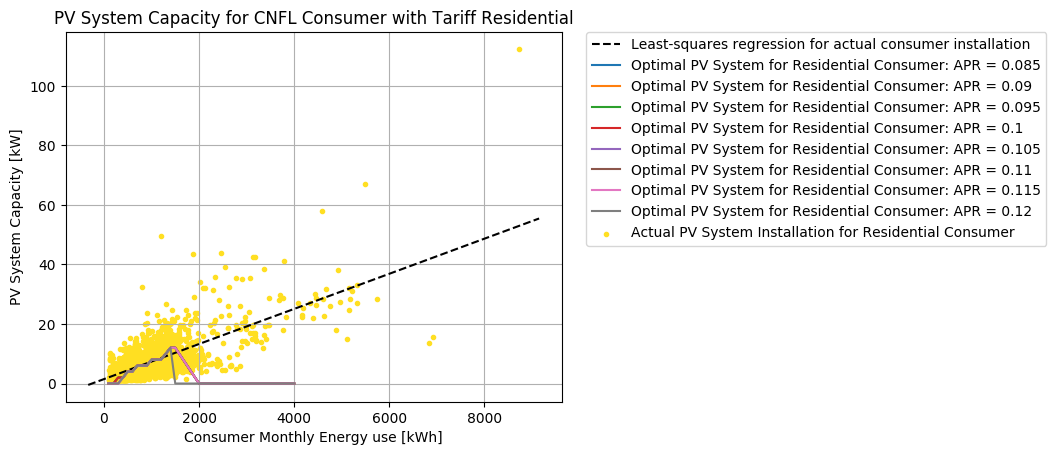

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [65]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions, linreg=true)

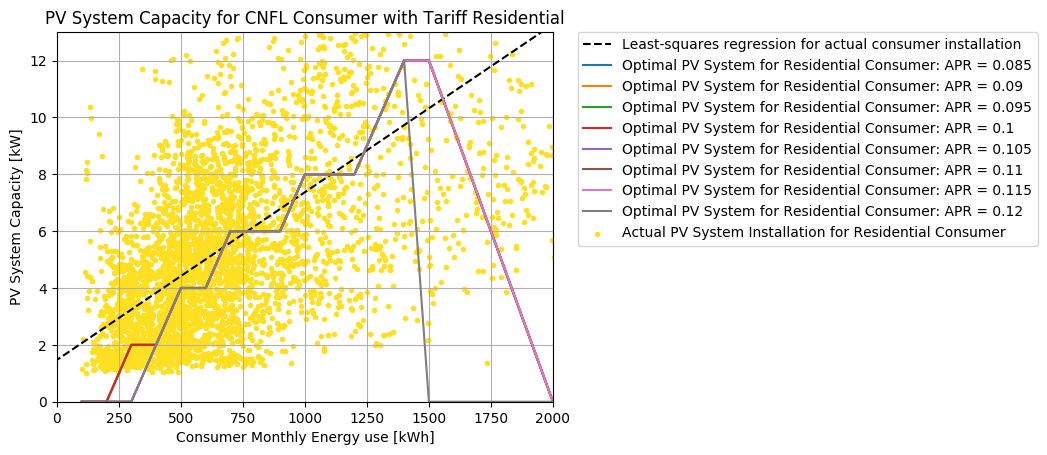

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [64]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions, x_max=2000, y_max=13, linreg=true)

In [41]:
changing_years_model_predictions = []
changing_years_descriptions = []
for i in 3:1:10
    new_BAC1 = Financial(0.045, 0.085, i, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_years_model_predictions, res_model_predictions)
    push!(changing_years_descriptions, string("Years till payback = ", i))
end

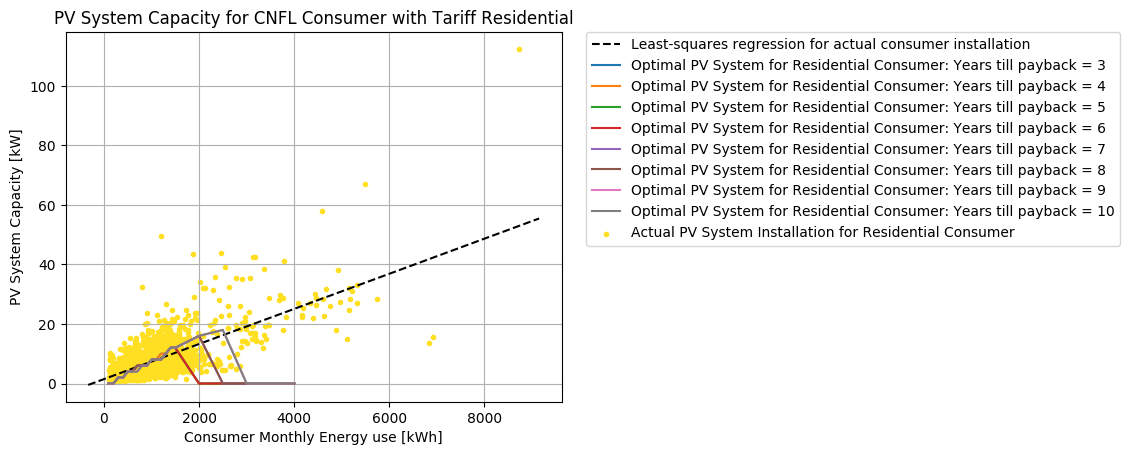

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [63]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions, linreg=true)

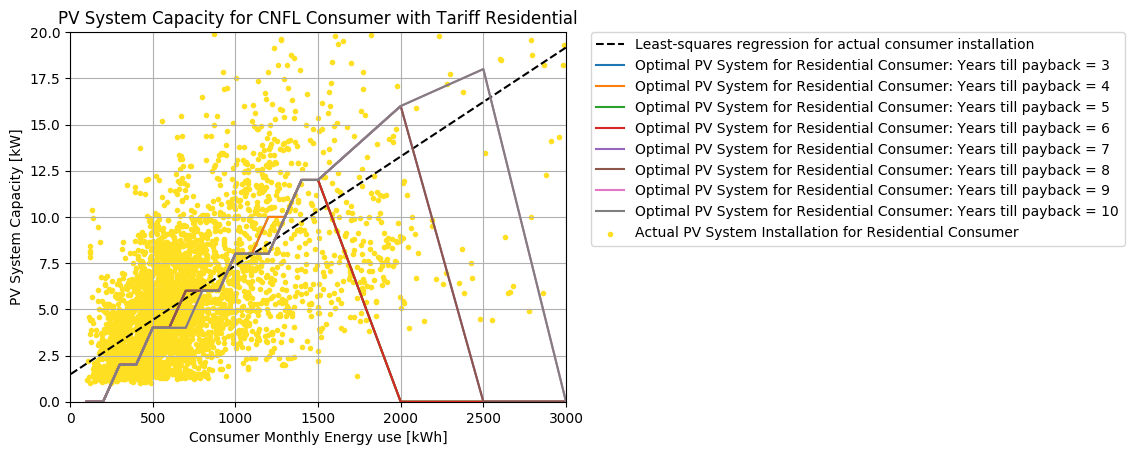

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [62]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions, x_max=3000, y_max=20, linreg=true)

In [46]:
both_inc_model_predictions = []
both_inc_descriptions = []
all_aprs = [0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12]
all_years = [3,4,5,6,7,8,9,10]
for i in 1:length(all_aprs)
    apr = all_aprs[i]
    yrs = all_years[i]
    new_BAC1 = Financial(0.045, apr, yrs, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(both_inc_model_predictions, res_model_predictions)
    push!(both_inc_descriptions, string("APR = ", apr, ", Years = ", yrs))
end

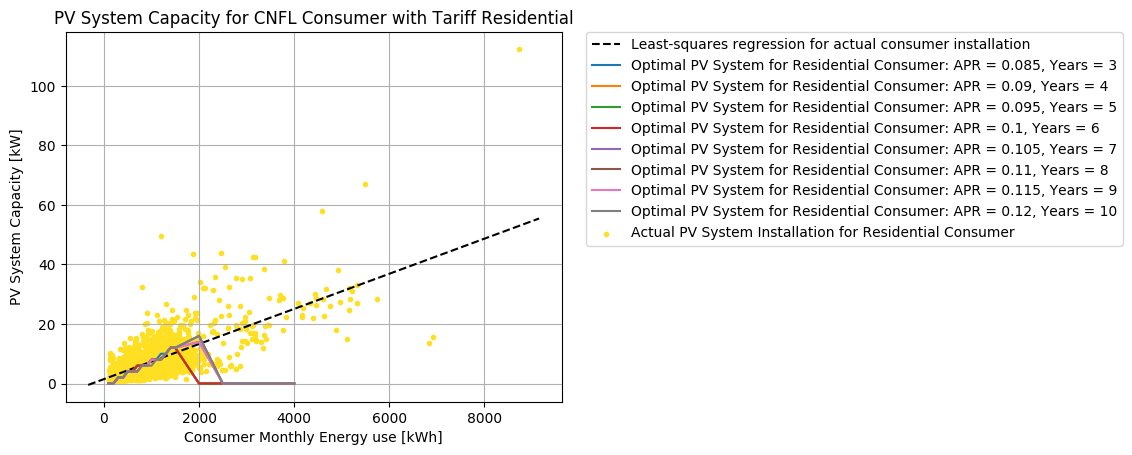

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [61]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions, linreg=true)

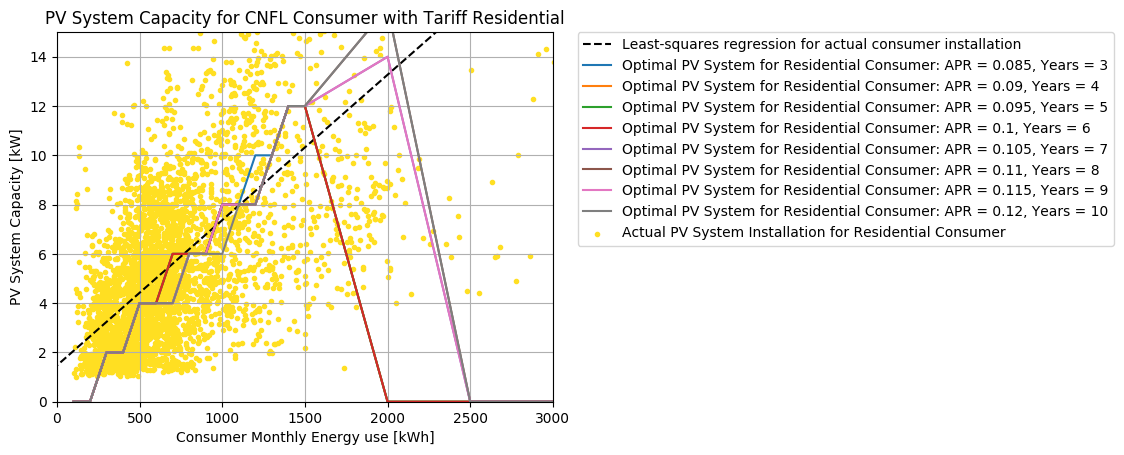

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [60]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions, x_max=3000, y_max=15, linreg=true)

In [49]:
tariff_inc_model_predictions = []
tariff_inc_descriptions = []
for i in 0.02:0.02:0.1
    new_R_CNFL = Tariff("CNFL",
                "Residential",
                [(0:200, 63.13), (200:300, 96.87), (300:1000, 100.14)],
                [(0:100, 0.0)],
                i,
                21.03,
                3.51,
                0.10,
                [0.992832136 0.999770704 1.00427654 0.983489891 1.009385917 1.012387984 0.979508228 0.994153679 0.97686098 1.015651323 1.015252586 1.016430032],
				1893.90);
    cnfl_residential.tariff = new_R_CNFL;
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, PVRes, 0.0:2:30, BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(tariff_inc_model_predictions, res_model_predictions)
    push!(tariff_inc_descriptions, string("Tariff = ", i))
end


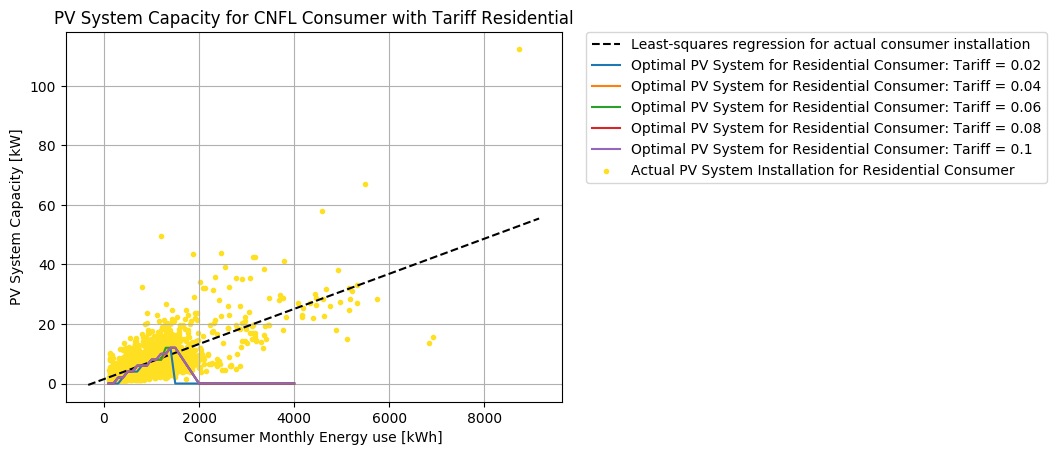

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [59]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, tariff_inc_model_predictions; model_descriptions=tariff_inc_descriptions, linreg=true)

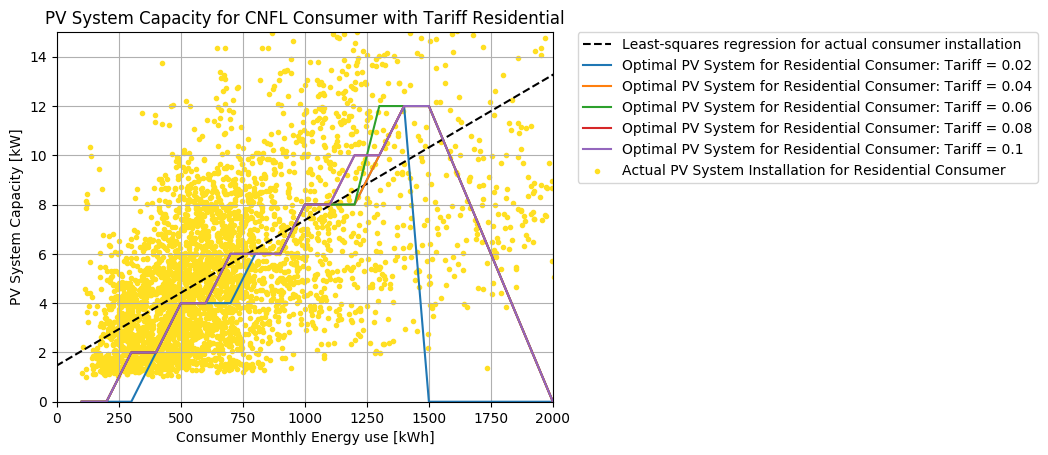

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [58]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, tariff_inc_model_predictions; model_descriptions=tariff_inc_descriptions, x_max=2000, y_max=15, linreg=true)

In [52]:
cost_tuples = [(2000,1800,1700,1500,1000),(2200,2000,1900,1700,1200),(3000,2300,1950,1625,1050)]
changing_cost_ranges_model_predictions = []
changing_cost_ranges_descriptions = []
for cost_tuple in cost_tuples
    r1,r2,r3,r4,r5 = cost_tuple
    new_cnfl_PVRes = PVSystem(1.8,
                [171,155,132,115,104,92,96,111,115,125,114,153],
                0.08,
                [(0:3.0, r1), (3.0:5.0, r2), (5.0:10.0, r3), (10.0:100.0, r4), (100.0:1000.0, r5)],
                15000,
                pv_output)
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, new_cnfl_PVRes, 0.0:2:30, BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_cost_ranges_model_predictions, res_model_predictions)
    push!(changing_cost_ranges_descriptions, string("PV system costs = ", cost_tuple))
end


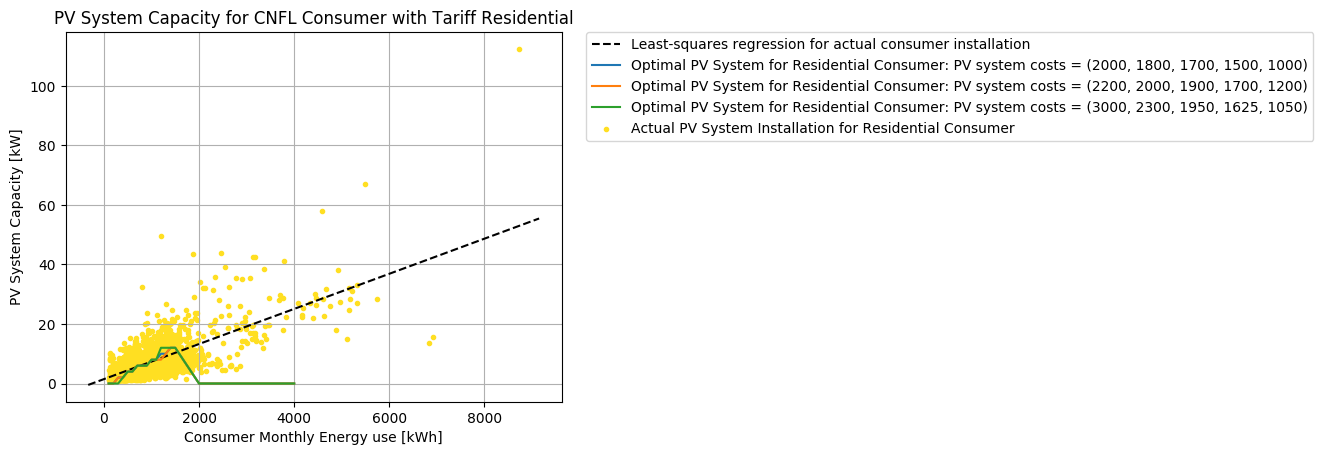

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#915(::Array{Any,1}, ::Nothing, ::Nothing, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:117
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:117
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#915(::Array{Any,1}, ::Nothing, ::Nothing, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:118
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:118


PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [57]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_cost_ranges_model_predictions; model_descriptions=changing_cost_ranges_descriptions, linreg=true)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = create_consumption_and_installation_arrays(::DataFrame) at plotting_base_gd.jl:77
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:77
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = create_consumption_and_installation_arrays(::DataFrame) at plotting_base_gd.jl:77
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:77


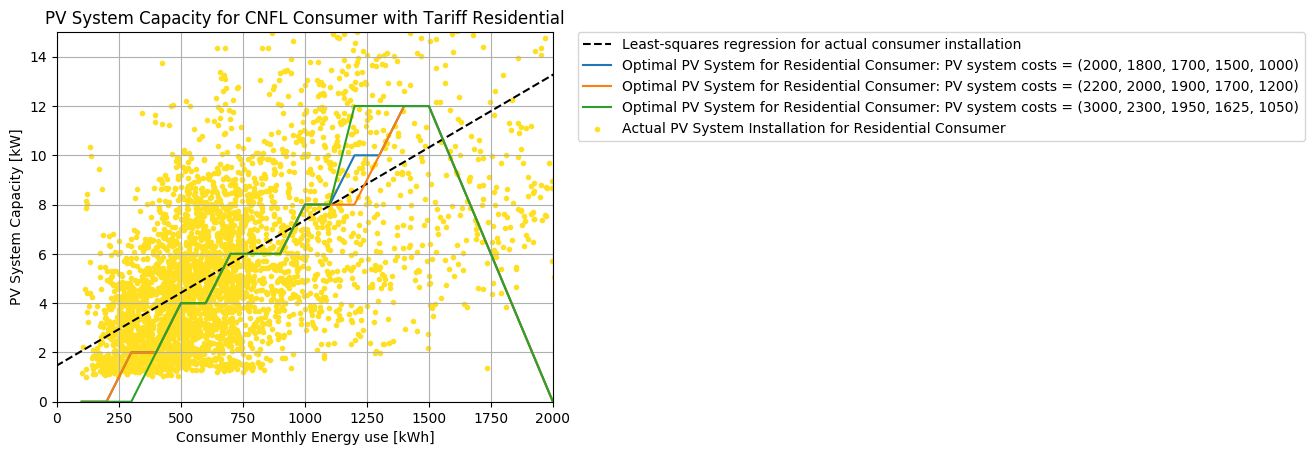

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#915(::Array{Any,1}, ::Int64, ::Int64, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:117
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:117
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#915(::Array{Any,1}, ::Int64, ::Int64, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:118
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:118


PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [56]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, changing_cost_ranges_model_predictions; model_descriptions=changing_cost_ranges_descriptions, x_max=2000,y_max=15, linreg=true)